In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
##Training Image Preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 70295 files belonging to 38 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [3]:
##Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
model = Sequential()

## Building convolution layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation= 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 1500, activation='relu'))

model.add(Dropout(0.40))

##output layer
model.add(Dense(units=38, activation='softmax'))

c:\Users\user\OneDrive\Desktop\plantdisproj\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
##compliling model
model.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [7]:
##model training
training_history = model.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3249s 1s/step - accuracy: 0.3881 - loss: 2.1997 - val_accuracy: 0.8289 - val_loss: 0.5365
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3022s 1s/step - accuracy: 0.8336 - loss: 0.5334 - val_accuracy: 0.8922 - val_loss: 0.3467
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2828s 1s/step - accuracy: 0.9044 - loss: 0.2974 - val_accuracy: 0.9104 - val_loss: 0.2775
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2987s 1s/step - accuracy: 0.9351 - loss: 0.2033 - val_accuracy: 0.9091 - val_loss: 0.2761
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2891s 1s/step - accuracy: 0.9501 - loss: 0.1513 - val_accuracy: 0.9115 - val_loss: 0.2862
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2982s 1s/step - accuracy: 0.9606 - loss: 0.1209 - val_accuracy: 0.9471 - val_loss: 0.1725
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2891s 1s/step - accuracy: 0.9689 - loss: 0.0949 - val_accuracy: 0.9556 - val_loss: 0.1515
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2993s 1s/step - accuracy: 0.9740 -

In [8]:
##Model evaluation
train_loss,train_acc = model.evaluate(training_set)
print(train_loss,train_acc)

val_loss,val_acc = model.evaluate(validation_set)
print(val_loss,val_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 847s 385ms/step - accuracy: 0.9845 - loss: 0.0491
0.04599731042981148 0.9856177568435669
550/550 ━━━━━━━━━━━━━━━━━━━━ 211s 383ms/step - accuracy: 0.9579 - loss: 0.1457
0.14723928272724152 0.9581151604652405


In [9]:
##saving model
model.save("trained_model.keras")
training_history.history


{'accuracy': [0.5957038402557373,
  0.8562771081924438,
  0.9142186641693115,
  0.9393840432167053,
  0.9548189640045166,
  0.9639519453048706,
  0.9699693918228149,
  0.975446343421936,
  0.9793441891670227,
  0.9801408648490906],
 'loss': [1.384469747543335,
  0.4566444754600525,
  0.2668454349040985,
  0.1884039044380188,
  0.13755618035793304,
  0.11025972664356232,
  0.09105412662029266,
  0.07475025206804276,
  0.06344657391309738,
  0.06056475266814232],
 'val_accuracy': [0.8289324045181274,
  0.8921579718589783,
  0.9103687405586243,
  0.909116804599762,
  0.9115069508552551,
  0.9471318125724792,
  0.9555543065071106,
  0.9580582976341248,
  0.9609037041664124,
  0.9581151604652405],
 'val_loss': [0.5365239977836609,
  0.34666019678115845,
  0.27750498056411743,
  0.2761360704898834,
  0.2862425446510315,
  0.17247678339481354,
  0.151492178440094,
  0.14920450747013092,
  0.14115235209465027,
  0.14723919332027435]}

In [10]:
##recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

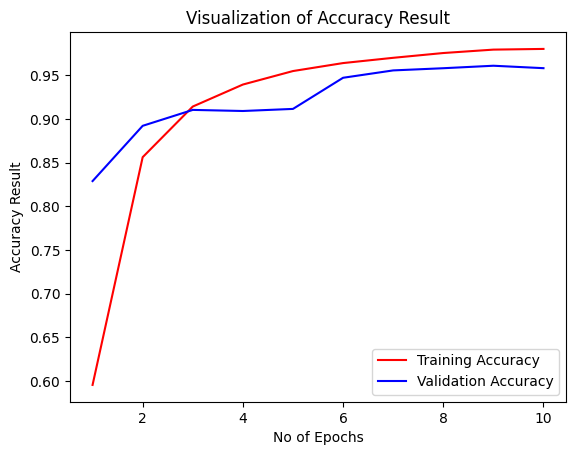

In [11]:
##Accuracy Visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [13]:
##Some other metrics for model evaulation
class_name = validation_set.class_names

test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

y_pred = model.predict(test_set)
y_pred

predicted_categories = tf.argmax(y_pred,axis=1)

true_categories = tf.concat([y for x,y in test_set],axis=0)
Y_true = tf.argmax(true_categories,axis=1)

from sklearn.metrics import classification_report
print(classification_report(Y_true,predicted_categories,target_names=class_name))



Found 17572 files belonging to 38 classes.
550/550 ━━━━━━━━━━━━━━━━━━━━ 339s 612ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       1.00      0.92      0.96       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.96      0.93      0.95       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.96      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.87      0.92       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99  